# Top 10 Important Features in Predicting Obesity Level
This bar chart visualizes the **top 10 most important features** that influence obesity level prediction. The importance score represents the contribution of each feature to the model. Understanding these features helps in identifying key factors contributing to obesity and designing better intervention strategies!
##  Key Observations:
- **Weight** is the most significant factor in determining obesity.
- **Age, Food Consumption (FCVC), and Height** also play notable roles.
- **Gender** is an important factor but not as influential as physical attributes like weight and height.
- **Physical activity (FAF) and water intake (CH2O)** have moderate influence.
## Visualization Details:
- The **y-axis lists the feature names**, and the **x-axis represents their importance score**.
- The **chart is sorted in descending order**, highlighting the most influential features at the top.

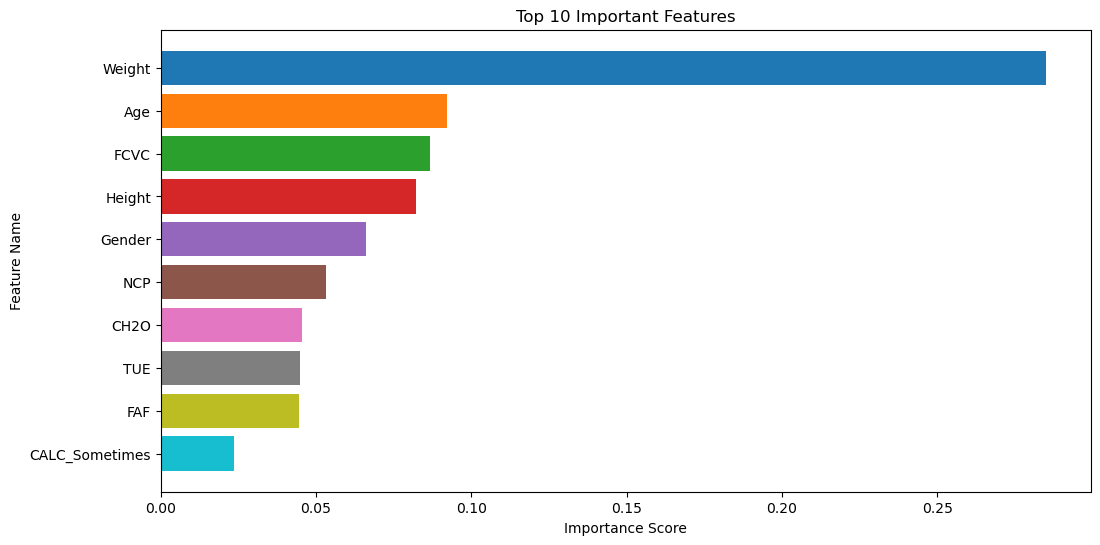

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("G:\DSI\Project\Team3_Estimation_of_Obesity_Levels\data\Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv") 

df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
146,Female,27.000000,1.600000,61.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
2062,Female,25.951979,1.661712,112.098616,yes,yes,3.000000,3.000000,Sometimes,no,2.961899,no,0.259424,0.080128,Sometimes,Public_Transportation,Obesity_Type_III
612,Female,34.799519,1.689141,50.000000,yes,yes,2.652779,3.804944,Frequently,no,1.601140,no,0.174692,0.096982,no,Public_Transportation,Insufficient_Weight
1156,Male,17.997009,1.742654,85.000000,yes,no,2.000000,3.000000,Sometimes,no,2.976229,no,1.000000,0.121992,Sometimes,Public_Transportation,Overweight_Level_II
1291,Male,36.023972,1.670667,90.575934,yes,yes,2.903545,1.508685,Sometimes,no,2.450069,no,1.454730,0.000000,Sometimes,Automobile,Obesity_Type_I


In [6]:
# Define target variable
target = 'NObeyesdad'

# Define feature columns
num_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Define X and y
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalize features
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categories
])

# Combine both transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [7]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X, y)

# Get feature importances
importances = model.named_steps['classifier'].feature_importances_
feature_names = (
    num_features + 
    list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))
)

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head(10))


         Feature  Importance
2         Weight    0.285148
0            Age    0.092262
3           FCVC    0.086520
1         Height    0.082262
4            NCP    0.053154
5           CH2O    0.045313
7            TUE    0.044781
6            FAF    0.044349
8  Gender_Female    0.034467
9    Gender_Male    0.031502


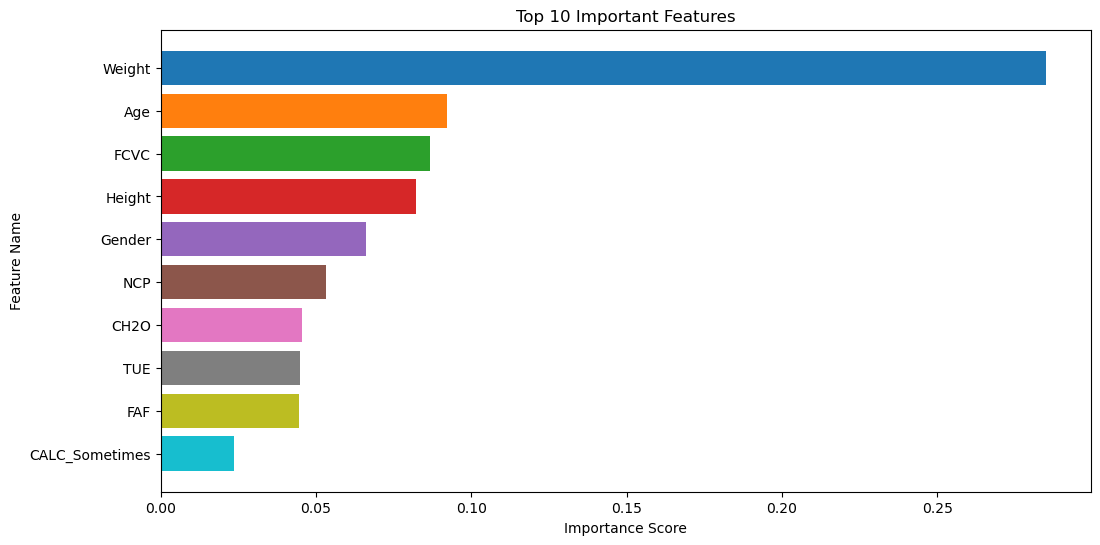

In [8]:


# If you haven't merged Gender yet, do this first:
feature_importance_df = feature_importance_df.copy()

# Merge 'Gender_Male' & 'Gender_Female' into 'Gender'
if 'Gender_Male' in feature_importance_df['Feature'].values and 'Gender_Female' in feature_importance_df['Feature'].values:
    male_importance = feature_importance_df.loc[feature_importance_df['Feature'] == 'Gender_Male', 'Importance'].values[0]
    female_importance = feature_importance_df.loc[feature_importance_df['Feature'] == 'Gender_Female', 'Importance'].values[0]

    # Remove the old features and add the merged one
    feature_importance_df = feature_importance_df[~feature_importance_df['Feature'].isin(['Gender_Male', 'Gender_Female'])]
    feature_importance_df = pd.concat([
        feature_importance_df,
        pd.DataFrame({'Feature': ['Gender'], 'Importance': [male_importance + female_importance]})
    ], ignore_index=True)

# Sort by importance again after merging
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select top 10 features
top_features = feature_importance_df[:10]

# Set unique colors for each bar
colors = sns.color_palette("tab10", len(top_features))  # Generates a distinct color for each bar

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
